In [4]:
!pip install opencv-python pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.7 MB/s eta 0:00:00


In [5]:
import utils

import pingouin as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

seed = 42
AMOUNT_OF_FRAMES = 120
BLENDNAMES = ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'cheekPuff', 'cheekSquintLeft', 'cheekSquintRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInLeft', 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeLookUpLeft', 'eyeLookUpRight', 'eyeSquintLeft', 'eyeSquintRight', 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthDimpleLeft', 'mouthDimpleRight', 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLeft', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPressLeft', 'mouthPressRight', 'mouthPucker', 'mouthRight', 'mouthRollLower', 'mouthRollUpper', 'mouthShrugLower', 'mouthShrugUpper', 'mouthSmileLeft', 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight', 'noseSneerLeft', 'noseSneerRight']

In [3]:
path2data = "/project_ghent/Master-Thesis/featureExtraction/output_blendshape_split"
SKIP_FRAMES = 1

important_blendshapes = [8, 17, 18, 26, 28, 33, 43]
ids, labels, groups, catgs = utils.get_vids(path2data)
# ids, labels, groups, catgs = utils.get_vids(path2data, maxpercat=[100, 300])
utils.split_dataset(ids, labels, groups, skipframes=SKIP_FRAMES, name="big_important", important=important_blendshapes)

Name		 ids labels groups
--------------------------------------
Train_val: 	 6780 6780 31
Test: 		 740 740 4
Train: 		 5069 5069 23
Validation: 	 1711 1711 8
--------------------------------------
Name distribution:	 YES - NO
Original distribution:	 0.7253989361702128 - 0.2746010638297872
Train distribution:	 0.7119747484710989 - 0.2880252515289012
Val distribution:	 0.7375803623611923 - 0.2624196376388077
Test distribution:	 0.7891891891891892 - 0.21081081081081082
--------------------------------------
Succesfully saved at /project_ghent/Master-Thesis/ownModelNotebooks/pickled/ with skipframes = 1 [big_important]


In [10]:
SKIP_FRAMES = 1
train_ds, val_ds, test_ds = utils.get_dataset(skipframes=SKIP_FRAMES, name="big_important")

Succesfully retrieved at /project_ghent/Master-Thesis/ownModelNotebooks/pickled/ with skipframes = 1 [big_important]


In [11]:
len(train_ds[0][0][0]), len(train_ds[0][0])

(7, 120)

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

batch_size = 1
num_workers = 4

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers)

blendshape_data_0 = [[] for _ in range(52)]
blendshape_data_1 = [[] for _ in range(52)]

for loader in [train_dl, val_dl, test_dl]:
    print("Starting loader")
    for input, label in loader:
        print(input, label)
        for i in range(52):
            if label.item() == 0:
                blendshape_data_0[i].append(input.squeeze(0).mean(dim=0)[i].item())
            elif label.item() == 1:
                blendshape_data_1[i].append(input.squeeze(0).mean(dim=0)[i].item())

# Convert lists to numpy arrays for easier manipulation
blendshape_data_0 = np.array(blendshape_data_0)
blendshape_data_1 = np.array(blendshape_data_1)

for i in range(52):
    min_val_0 = np.min(blendshape_data_0[i])
    max_val_0 = np.max(blendshape_data_0[i])
    blendshape_data_0[i] = (blendshape_data_0[i] - min_val_0) / (max_val_0 - min_val_0)

    min_val_1 = np.min(blendshape_data_1[i])
    max_val_1 = np.max(blendshape_data_1[i])
    blendshape_data_1[i] = (blendshape_data_1[i] - min_val_1) / (max_val_1 - min_val_1)

fig, axs = plt.subplots(13, 4, figsize=(10, 40))
axs = axs.flatten()

for i in range(52):
    data = [blendshape_data_0[i], blendshape_data_1[i]]
    axs[i].boxplot(data, labels=['NO', 'YES'])
    axs[i].set_title(f"Blendshape {i}")
    axs[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()

Starting loader
tensor([[[2.6099e-07, 9.4862e-03, 9.3889e-03, 6.6355e-05, 3.6192e-03,
          5.9005e-03, 3.4469e-02],
         [2.9392e-07, 8.4337e-03, 8.3415e-03, 6.7998e-05, 4.3672e-03,
          5.2944e-03, 3.8425e-02],
         [2.5065e-07, 9.7510e-03, 8.6486e-03, 7.6133e-05, 3.4366e-03,
          3.1957e-03, 4.1952e-02],
         [2.7753e-07, 1.0608e-02, 1.0089e-02, 5.6004e-05, 3.5557e-03,
          9.8261e-03, 4.1737e-02],
         [1.7349e-07, 1.4550e-02, 1.2438e-02, 1.0083e-04, 1.4454e-03,
          2.9990e-03, 3.4063e-02],
         [1.8172e-07, 2.5088e-02, 2.2001e-02, 3.7735e-05, 1.4085e-03,
          1.0588e-02, 1.8123e-02],
         [1.7476e-07, 2.6703e-02, 2.3810e-02, 3.2986e-05, 1.2757e-03,
          1.1156e-02, 1.9160e-02],
         [1.7838e-07, 2.6474e-02, 2.2944e-02, 2.8090e-05, 1.2669e-03,
          1.7254e-02, 2.0756e-02],
         [1.7762e-07, 2.6737e-02, 2.3045e-02, 2.4955e-05, 1.2287e-03,
          2.5055e-02, 2.0040e-02],
         [2.0161e-07, 2.5499e-02, 2.206

IndexError: index 7 is out of bounds for dimension 0 with size 7

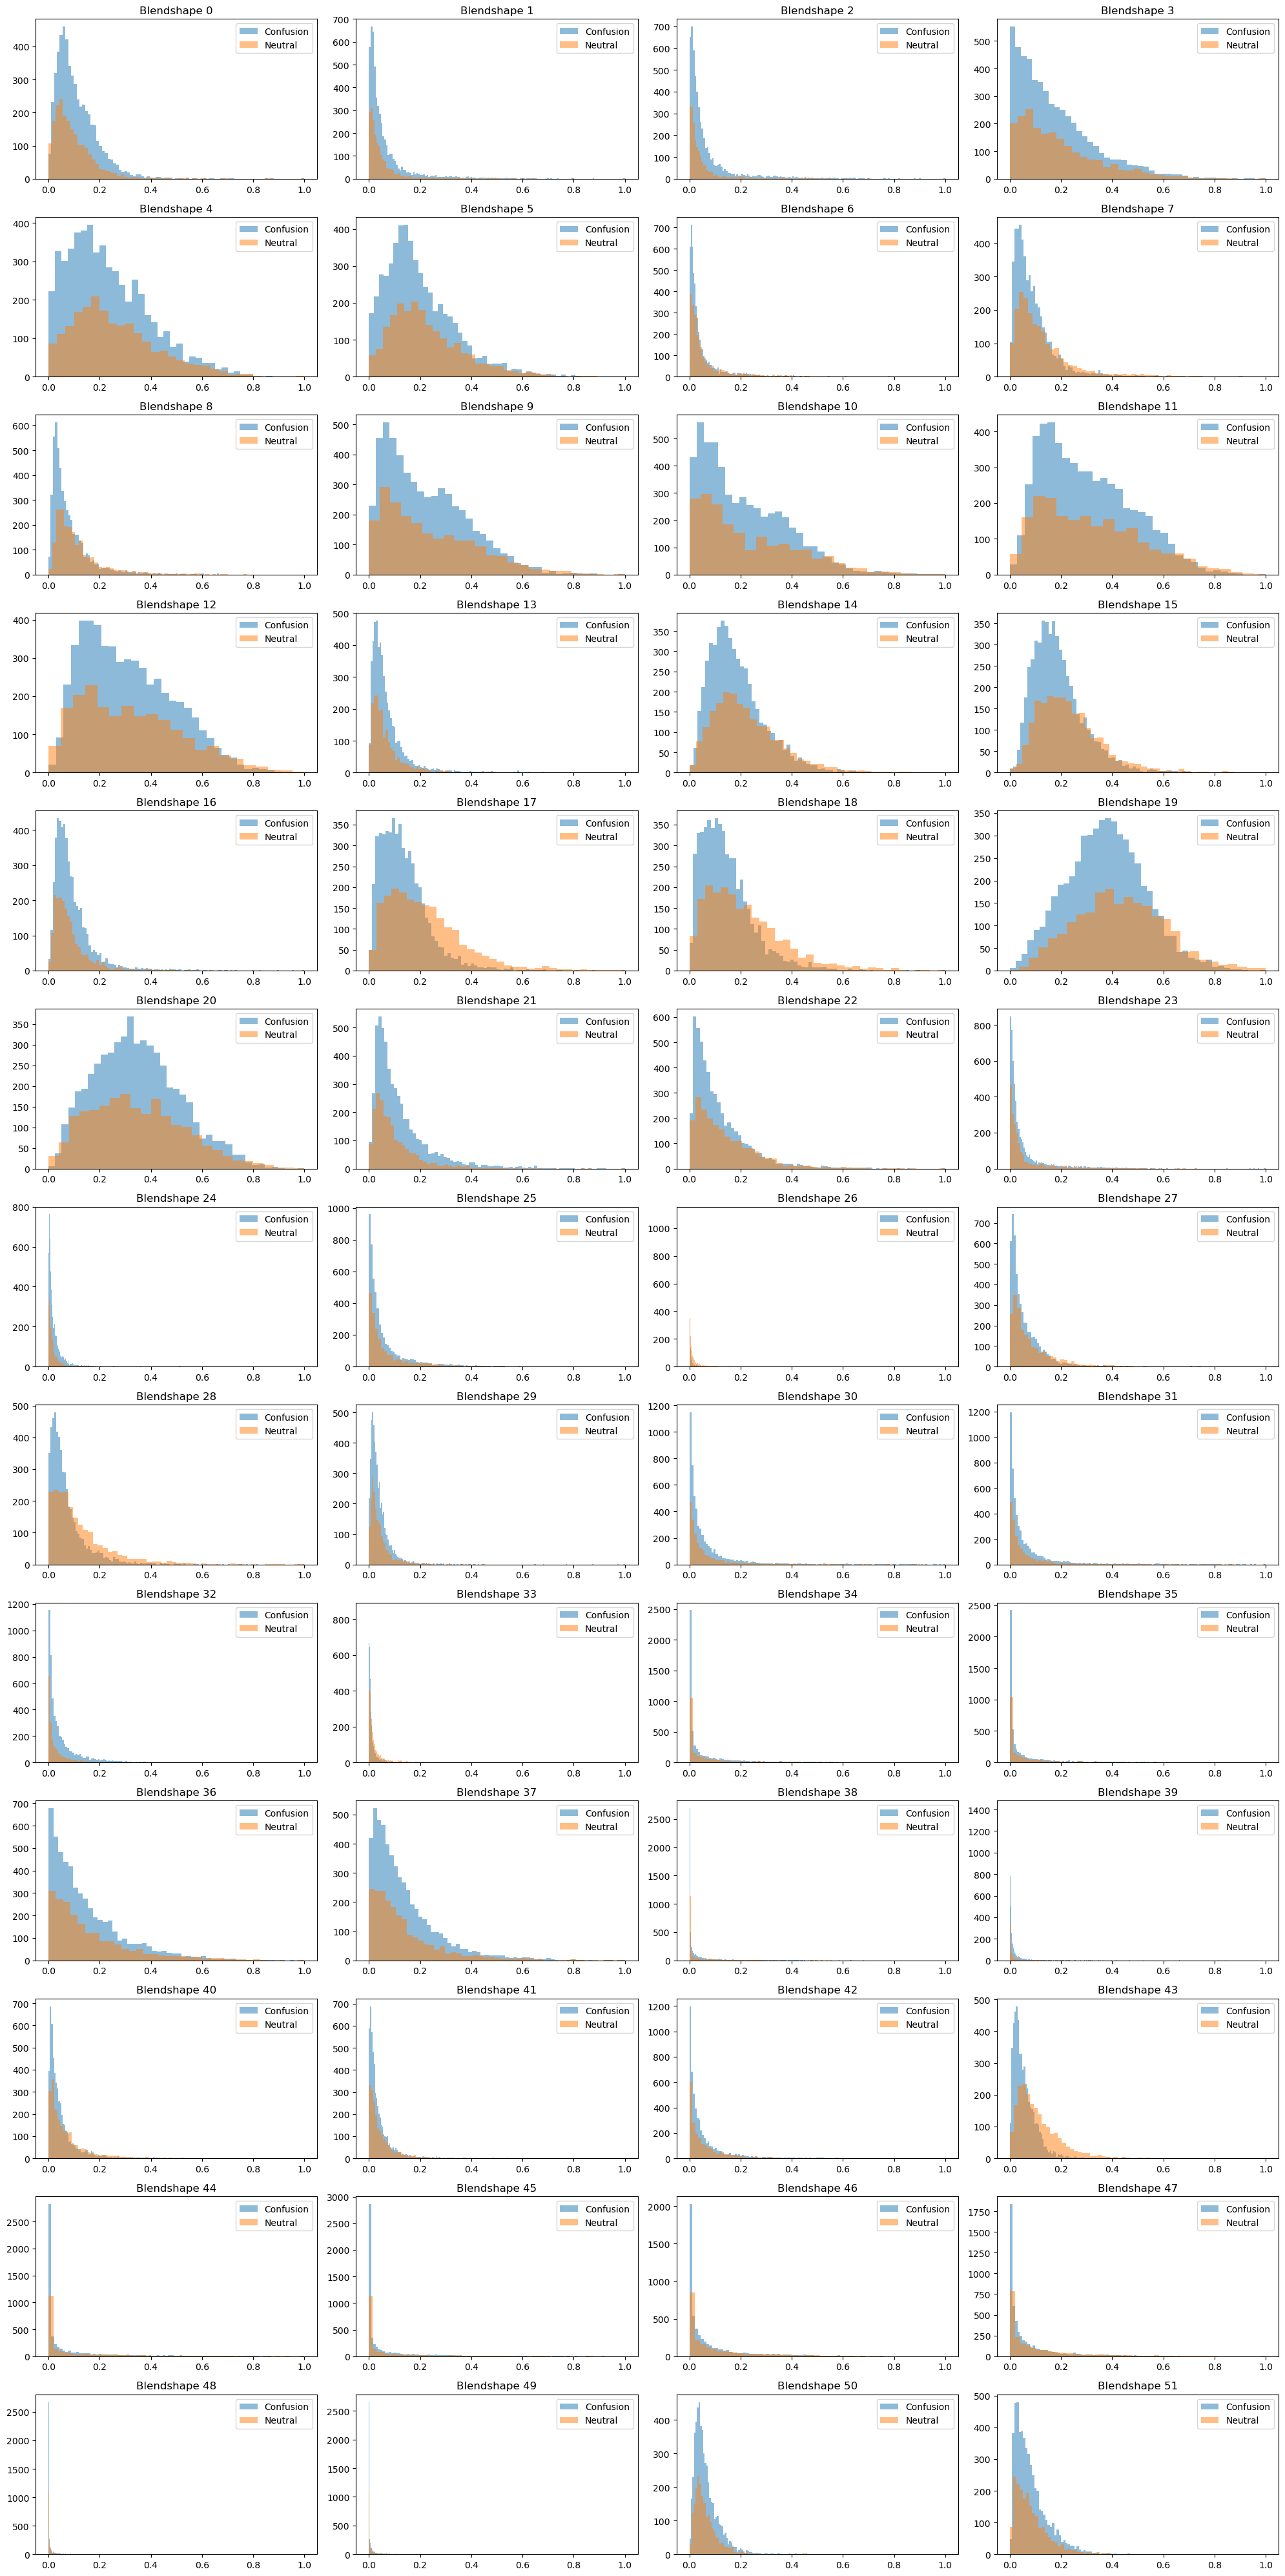

In [45]:
bins = 'auto'

fig, axs = plt.subplots(13, 4, figsize=(20, 40))  # Adjust the figure size as needed
axs = axs.flatten()

for i in range(52):
    # Plotting both categories in the same histogram for each blendshape
    axs[i].hist(blendshape_data_0[i], bins=bins, alpha=0.5, label='Confusion')
    axs[i].hist(blendshape_data_1[i], bins=bins, alpha=0.5, label='Neutral')
    axs[i].set_title(f"Blendshape {i}")
    axs[i].legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

# Not normally distributed if pvalue < 0.05
for i in range(52):
    print(f"Blendshape {i}: Confusion {shapiro(blendshape_data_0[i]).pvalue:.4f}, \tNeutral {shapiro(blendshape_data_1[i]).pvalue:.4f}")

In [50]:
from scipy.stats import mannwhitneyu, norm
import numpy as np

# https://datatab.net/tutorial/mann-whitney-u-test
# effect size r less than 0.3 → small effect
# effect size r between 0.3 and 0.5 → medium effect
# effect size r greater than 0.5 → large effect

# Assuming blendshape_data_0 and blendshape_data_1 are available
significance = 0.05
important_ones = []

for i in range(52):
    # Perform the Mann-Whitney U test
    result = mannwhitneyu(blendshape_data_0[i], blendshape_data_1[i])
    p_value = result.pvalue
    U = result.statistic
    n1 = len(blendshape_data_0[i])
    n2 = len(blendshape_data_1[i])
    
    # if p_value < significance:
    if True:
        # Calculate the rank-biserial correlation as an effect size
        effect_size = 1 - (2*U) / (n1*n2)
        
        # Calculate the z-score for the U statistic
        z = (U - (n1*n2/2)) / np.sqrt(n1*n2*(n1+n2+1)/12) # http://statisticslectures.com/topics/mannwhitneyu/
        effect_size = abs(z) / np.sqrt(n1+n2) # https://www.researchgate.net/post/How_can_i_calculate_Effect_Size_for_Mann_Whitney_U_test

        # Calculate the 95% confidence interval for the z-score
        z_critical = norm.ppf(1 - significance/2) # two-tailed test
        margin_of_error = z_critical * np.sqrt(1/(n1*n2))
        
        # Convert z-score confidence interval back to U statistic range
        U_conf_low = (z - margin_of_error) * np.sqrt(n1*n2*(n1+n2+1)/12) + (n1*n2/2)
        U_conf_high = (z + margin_of_error) * np.sqrt(n1*n2*(n1+n2+1)/12) + (n1*n2/2)

        if effect_size >= 0.2:
            important_ones.append(i)
            print(f"Blendshape {i}: p-value={p_value:.4e}, effect size={effect_size:.4f}, "
                  f"U confidence interval=({U_conf_low:.4f}, {U_conf_high:.4f})")


Blendshape 8: p-value=1.1089e-76, effect size=0.2137, U confidence interval=(4074976.9323, 4075075.0677)
Blendshape 17: p-value=2.2879e-122, effect size=0.2713, U confidence interval=(3655605.9323, 3655704.0677)
Blendshape 18: p-value=2.4069e-78, effect size=0.2161, U confidence interval=(4057756.9323, 4057855.0677)
Blendshape 26: p-value=1.1583e-170, effect size=0.3211, U confidence interval=(3292381.9323, 3292480.0677)
Blendshape 28: p-value=1.4427e-93, effect size=0.2366, U confidence interval=(3908104.9323, 3908203.0677)
Blendshape 33: p-value=7.1724e-85, effect size=0.2251, U confidence interval=(3991936.9323, 3992035.0677)
Blendshape 43: p-value=1.0769e-190, effect size=0.3397, U confidence interval=(3157278.9323, 3157377.0677)


In [15]:
for i in [8, 17, 18, 26, 28, 33, 43]:
    print(BLENDNAMES[i])

cheekSquintRight
eyeLookUpLeft
eyeLookUpRight
jawRight
mouthDimpleLeft
mouthLeft
mouthShrugUpper


# Test out simple model

In [7]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        x = x.sum(dim=1)
        return self.linear(x)

Succesfully retrieved at /project_ghent/Master-Thesis/ownModelNotebooks/pickled/ with skipframes = 1 [big_important]
Training...


Epoch 100/100: 100%|██████████| 634/634 [00:16<00:00, 39.32batch/s, Loss=0.666]


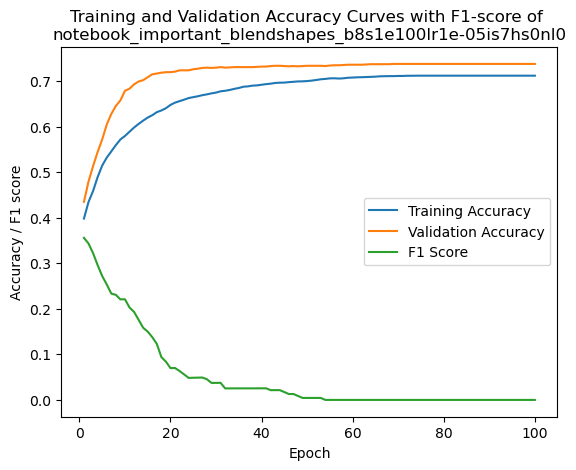

Plotting confusion matrix...


<Figure size 640x480 with 0 Axes>

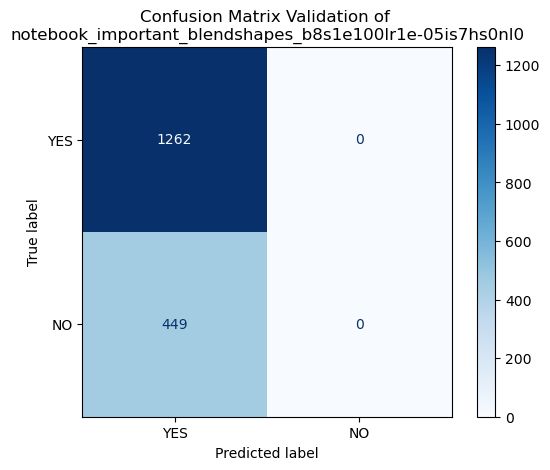

Plotting ROC curve...


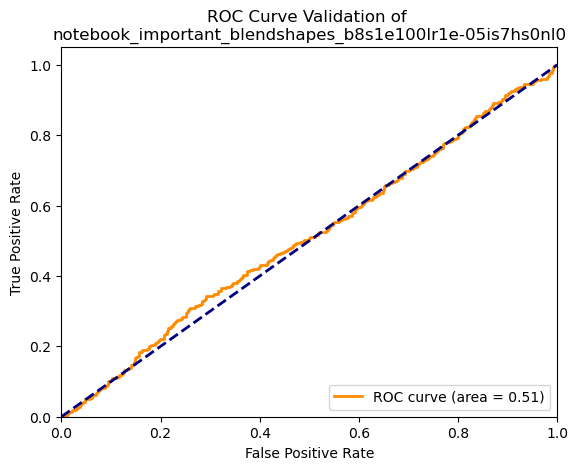

Saving model...


In [11]:
important_blendshapes = [8, 17, 18, 26, 28, 33, 43]

batch_size = 8
skipframes = 1
num_epochs = 100
lr = 1e-5
num_workers = 4
pos_weight = 0.378
INPUT_SIZE = len(important_blendshapes)
HIDDEN_SIZE = 0
NUM_LAYERS = 0
name_dataset = "big_important"

name = f"notebook_important_blendshapes_b{batch_size}s{skipframes}e{num_epochs}lr{lr}is{INPUT_SIZE}hs{HIDDEN_SIZE}nl{NUM_LAYERS}"

train_ds, val_ds, test_ds = utils.get_dataset(skipframes=skipframes, name=name_dataset)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, worker_init_fn=np.random.seed(seed), num_workers=num_workers)
val_dl = DataLoader(val_ds, batch_size=2*batch_size, shuffle=False, num_workers=num_workers)  
test_dl = DataLoader(test_ds, batch_size=2*batch_size, shuffle=False, num_workers=num_workers)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LogisticRegressionModel(INPUT_SIZE).to(device)

# criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCEWithLogitsLoss(reduction='mean', pos_weight=torch.tensor([pos_weight]).to(device))
optimizer = optim.Adam(model.parameters(), lr=lr)

parameters = {"device": device, 
              "epochs": num_epochs,
              "trainloader": train_dl,
              "valloader": val_dl,
              "testloader": test_dl,
              "criterion": criterion,
              "optimizer": optimizer,
              "batch_size": batch_size,
              "amount_of_frames": AMOUNT_OF_FRAMES // skipframes,
              "categories":  utils.categories.keys(),
              "decision": 0.5}

print("Training...")

utils.train_and_plot(model, parameters, name)

print("Plotting confusion matrix...")

utils.plot_confusionmatrix(model, parameters, name, mode="Validation", verbose=False)

print("Plotting ROC curve...")

utils.plot_roc_curve(model, parameters, name, mode="Validation", verbose=False)

print("Saving model...")

torch.save(model, f"/project_ghent/Master-Thesis/ownModelNotebooks/models/blendshape_{name}.pth")